#####
#Code by Ana Hoban (260870004), in collaboration with Maude Larivière, Amalia Karalis, Nicolas Desjardins, Mattias Ladza
#March 9th 2022
#####

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#### from what was computed in 2.1: $$ F_{tot} = 15.7 \ u^2 \ + 600 \pi \ \nu \ u \ + \ 1029 \ u^2 , $$  where $\nu = 1e-6$ was removed from the second term 

#### Then, $ P=15.7 \ u^3 \ + \ 600 \pi \ \nu \ u^2 \ + \ 1029 \ u^3 $ is the power which we found to be 1045

$$ 0 = -1045 + 15.7 \ u^3 \ + \ 600 \pi\ \nu \ u^2 \ + \ 1029 \ u^3 $$


In [2]:
# Define the expression whose roots we want to find

nu = np.linspace(1, 1.5e4, 100) * 1e-6 # 1-10^4 of nu_water
func = lambda u :15.7*u**3 + 600*np.pi*nu*u**2+1029*u**3 - 1045

u_initial_guess = 100*[1]
u_solution = fsolve(func, u_initial_guess)


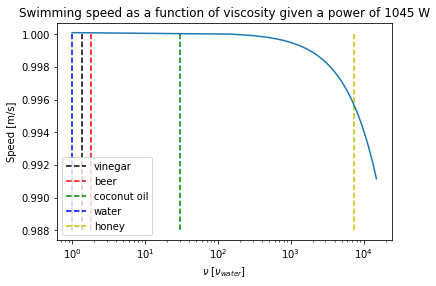

In [7]:
plt.plot(nu*1e6,u_solution)
plt.xscale('log')
plt.ylabel('Speed [m/s]')
plt.xlabel(r'$\nu$ [$\nu_{water}$]');

#labelling some known kinematic viscosities
#from https://www.engineersedge.com/fluid_flow/kinematic-viscosity-table.html
#and https://wiki.anton-paar.com/ca-en/flower-honey-blended/
known_visco = {'vinegar':1.35e-6, 'beer':1.8e-6, 'coconut oil': 3e-5, 'water': 1e-6,'honey': 7.5e-3}
colors = ['k', 'r', 'g', 'b','y']
for i, key in enumerate(known_visco):
    plt.vlines(known_visco[key]*1e6, 0.988, 1, colors[i], label = key, ls = '--' )
plt.legend()
plt.title('Swimming speed as a function of viscosity given a power of 1045 W');

These results make sense at least qualitatively as we expect the attainable speed to be non-linearly related to the viscosity (U ~ $\nu^{1/3}$). Therefore a big change in viscosity is necessary to impact the velocity.
Interestingly, the viscosity starts significantly impact velocity around 1000$\nu_{water}$. This makes sense considering that from personal experience honey is much more viscous and seems to be 'rougher' than oils such as coconut oil but is easy to stir.

the std and mean of a pro swimmer are: 0.01854723699099128 4.718


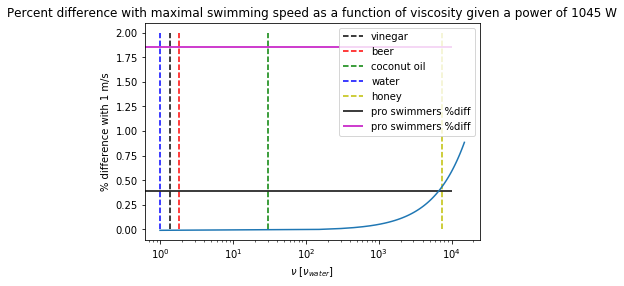

In [6]:
plt.plot(nu*1e6, (1-u_solution)*100) #plotting u as the %diff of 1m/s
plt.xscale('log')
plt.ylabel('% difference with 1 m/s')
plt.xlabel(r'$\nu$ [$\nu_{water}$]');

#labelling some known kinematic viscosities
for i, key in enumerate(known_visco):
    plt.vlines(known_visco[key]*1e6, 0, 2, colors[i], label = key, ls = '--' )
plt.legend()

#comparing to professiona/recreational swimmers performance variation 
pro_vel = np.array([4.702, 4.708, 4.744])
pro_std = np.std(pro_vel)
pro_mean = np.mean(pro_vel)
print('the std and mean of a pro swimmer are:', pro_std, pro_mean)

#the std between recreational swimmers will be minimally the same (if not bigger)

rec_std = np.std(pro_vel)
rec_mean = 1 #given by the problem

plt.hlines(pro_std/pro_mean*100,0,1e4, 'k', label = 'pro swimmers %diff')
plt.hlines(rec_std/rec_mean*100,0,1e4, 'm',label = 'pro swimmers %diff')
plt.legend()
plt.title('Percent difference with maximal swimming speed as a function of viscosity given a power of 1045 W');